## **Mini Project Data Mining**

Penggalian Data B

Nama Anggota Kelompok :
1. Putri Intan Ashuri (202010370311024)
2. Ica Wahyu Diana (202010370311220)
3. Novia Adelia Ujilast (202010370311243)


In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

Exploratory Data Analysis

In [ ]:
from google.colab import files
uploades = files.upload()

Saving Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2021.csv to Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2021 (1).csv


In [ ]:
#Membaca dan menampilkan 5 data urutan paling atas
df=pd.read_csv('Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2021.csv')
df.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3


In [ ]:
#Menampilkan metadata dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   365 non-null    object 
 1   pm10      365 non-null    int64  
 2   pm25      334 non-null    float64
 3   so2       365 non-null    int64  
 4   co        365 non-null    int64  
 5   o3        365 non-null    int64  
 6   no2       365 non-null    int64  
 7   max       365 non-null    int64  
 8   critical  365 non-null    object 
 9   categori  365 non-null    object 
 10  location  365 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 31.5+ KB


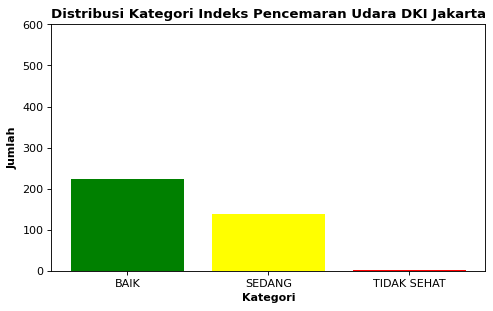

In [ ]:
#Melihat distribusi pada atribut categori
height = df['categori'].value_counts()
categori = ('BAIK', 'SEDANG', 'TIDAK SEHAT')
y_pos = np.arange(len(categori))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Kategori Indeks Pencemaran Udara DKI Jakarta', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['green', 'yellow', 'red'])
plt.xticks(y_pos, categori)
plt.show()

Data Cleaning

In [ ]:
#Cek missing value
df.isnull().sum()

tanggal      0
pm10         0
pm25        31
so2          0
co           0
o3           0
no2          0
max          0
critical     0
categori     0
location     0
dtype: int64

In [ ]:
#Mengisi data kosong pada atribut pm25 dengan nilai rata-rata
df['pm25'].fillna(value=df['pm25'].mean(), inplace=True)

In [ ]:
#Mengubah tipe data atribut tanggal menjadi datetime
df['tanggal']= pd.to_datetime(df['tanggal'])

In [ ]:
#Menampilkan metadata dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   365 non-null    datetime64[ns]
 1   pm10      365 non-null    int64         
 2   pm25      365 non-null    float64       
 3   so2       365 non-null    int64         
 4   co        365 non-null    int64         
 5   o3        365 non-null    int64         
 6   no2       365 non-null    int64         
 7   max       365 non-null    int64         
 8   critical  365 non-null    object        
 9   categori  365 non-null    object        
 10  location  365 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 31.5+ KB


Data Transformation

In [ ]:
#Label Encoding
labelencoder = LabelEncoder()
df['critical'] = labelencoder.fit_transform(df['critical'])
df['categori'] = labelencoder.fit_transform(df['categori'])
df['location'] = labelencoder.fit_transform(df['location'])

In [ ]:
df.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-01-01,43,94.694611,58,29,35,65,65,0,1,1
1,2021-01-02,58,94.694611,86,38,64,80,86,2,1,2
2,2021-01-03,64,94.694611,93,25,62,86,93,2,1,2
3,2021-01-04,50,94.694611,67,24,31,77,77,0,1,1
4,2021-01-05,59,94.694611,89,24,35,77,89,2,1,2


Feature Selection

In [ ]:
X = df[['pm10', 'pm25', 'so2', 'co', 'o3']]
y = df['categori']

Splitting Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state=0)

Data Normalization

In [ ]:
#MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train, "\n")
print(X_test, "\n")

[[0.3        0.53900709 0.48863636 0.15       0.20967742]
 [0.2875     0.34042553 0.18181818 0.225      0.25806452]
 [0.425      0.75886525 0.15909091 0.25       0.09677419]
 ...
 [0.2625     0.43262411 0.14772727 0.2        0.23387097]
 [0.16875    0.26950355 0.02272727 0.45       0.11290323]
 [0.25       0.36170213 0.18181818 0.225      0.08870968]] 

[[ 0.3         0.60283688  0.05681818  0.325       0.09677419]
 [ 0.19375     0.36879433  0.14772727  0.          0.20967742]
 [ 0.14375     0.23404255  0.02272727  0.15        0.08064516]
 [ 0.0875      0.43755043 -0.01136364  0.45       -0.05645161]
 [ 0.2875      0.5177305   0.06818182  0.225       0.23387097]
 [ 0.2125      0.24822695  0.06818182  0.1         0.05645161]
 [ 0.05625     0.13475177  0.03409091  0.1         0.12903226]
 [ 0.2125      0.28368794  0.15909091  0.325       0.09677419]
 [ 0.35625     0.63829787  0.14772727  0.1         0.13709677]
 [ 0.10625     0.43755043  0.15909091  0.375       0.22580645]
 [ 0.29375    

In [ ]:
# Standard Scaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

standard_x_train = standard_scaler.transform(X_train)
standard_x_test = standard_scaler.transform(X_test)

print(standard_x_train, "\n")
print(standard_x_test, "\n")

[[ 0.40998739  0.61807498  2.47971577 -0.41899553  0.28756835]
 [ 0.2785754  -0.58981752  0.10338428  0.09007532  0.77015431]
 [ 1.72410722  1.95538453 -0.07264027  0.2597656  -0.83846556]
 ...
 [ 0.01575144 -0.02901029 -0.16065255 -0.07961496  0.52886133]
 [-0.96983844 -1.0212077  -1.1287876   1.61728787 -0.67760357]
 [-0.11566055 -0.46040047  0.10338428  0.09007532 -0.91889656]] 

[[ 4.09987387e-01  1.00632614e+00 -8.64750766e-01  7.68836454e-01
  -8.38465562e-01]
 [-7.07014473e-01 -4.17261451e-01 -1.60652547e-01 -1.43713723e+00
   2.87568346e-01]
 [-1.23266241e+00 -1.23690279e+00 -1.12878760e+00 -4.18995528e-01
  -9.99327549e-01]
 [-1.82401633e+00  9.54536138e-04 -1.39282443e+00  1.61728787e+00
  -2.36665444e+00]
 [ 2.78575403e-01  4.88657923e-01 -7.76738489e-01  9.00753215e-02
   5.28861327e-01]
 [-5.09896498e-01 -1.15062475e+00 -7.76738489e-01 -7.58376094e-01
  -1.24062053e+00]
 [-2.15254629e+00 -1.84084904e+00 -1.04077532e+00 -7.58376094e-01
  -5.16741588e-01]
 [-5.09896498e-01 -

Naive Bayes Model

In [ ]:
# Membuat model Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Evaluasi Model

In [ ]:
print("Classification Report : \n", classification_report(y_test, y_pred))
print("F1 Score : \n", f1_score(y_test, y_pred))
print("Precision Score : \n", precision_score(y_test, y_pred))
print("Recall Score : \n", recall_score(y_test, y_pred))
print("Accuracy Score : \n", accuracy_score(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99        42
           2       0.97      1.00      0.98        31

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73

F1 Score : 
 0.9879518072289156
Precision Score : 
 1.0
Recall Score : 
 0.9761904761904762
Accuracy Score : 
 0.9863013698630136
